<a href="https://colab.research.google.com/github/MikiHiroshi/GoogleColabTips/blob/main/colab_tips_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

karaageさんのnotebookをコピー

# Google Colaboratory Tips

Google Colaboratory(Google Colab)のTips集


## スペック確認

OSバージョン

In [1]:
!cat /etc/issue

Ubuntu 18.04.5 LTS \n \l



容量確認

In [2]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   39G   30G  58% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
tmpfs           6.4G   24K  6.4G   1% /var/colab
/dev/sda1        75G   41G   35G  55% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


メモリ確認

In [3]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        546M         10G        1.1M        2.1G         11G
Swap:            0B          0B          0B


In [ ]:
!apt-get install lshw
!lshw

Reading package lists... Done
Building dependency tree       
Reading state information... Done
lshw is already the newest version (02.18-0.1ubuntu6.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
d1e3cb515fa6
    description: Computer
    width: 64 bits
    capabilities: smp vsyscall32
  *-core
       description: Motherboard
       physical id: 0
     *-memory
          description: System memory
          physical id: 0
          size: 12GiB
     *-cpu
          product: Intel(R) Xeon(R) CPU @ 2.20GHz
          vendor: Intel Corp.
          physical id: 1
          bus info: cpu@0
          width: 64 bits
          capabilities: fpu fpu_exception wp vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp x86-64 constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_

CPUのスペック確認

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.172
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 400

GPUのスペック確認
（以下は ランタイム -> ランタイムのタイプを変更 -> ハードウェアアクセラレーションをGPUに設定して確認する）

In [ ]:
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

Model: 		 Tesla P4
IRQ:   		 35
GPU UUID: 	 GPU-85622cd4-8a01-7c4e-1b9a-ed1f27f8f4bd
Video BIOS: 	 86.04.8c.00.10
Bus Type: 	 PCI
DMA Size: 	 47 bits
DMA Mask: 	 0x7fffffffffff
Bus Location: 	 0000:00:04.0
Device Minor: 	 0
Blacklisted:	 No


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9179762919197259155, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12772276294880708987
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6846415388926803111
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7470045594
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2941397237615016041
 physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"]

起動時間確認。Google Colabの時間制約に関しては、以下記事参照

[【秒速で無料GPUを使う】深層学習実践Tips on Colaboratory](https://qiita.com/tomo_makes/items/b3c60b10f7b25a0a5935)

In [ ]:
!cat /proc/uptime | awk '{print $1 /60 /60 /24 "days (" $1 "sec)"}'

0.00133137days (115.03sec)


## マジックコマンド

最初に!をつけることで、Linuxのコマンドが使用可能。

cdは!でなく%をつける

ディレクトリ作成

In [ ]:
!mkdir test

ファイル確認

In [ ]:
!ls

ディレクトリ移動

In [ ]:
%cd test

ファイルの作成

In [ ]:
!echo 'test' > test.txt

## ライブラリ

ライブラリのバージョン指定のインストール。
ディープラーニング関係のソフトはバージョン依存が激しいので、バージョン指定を使うのがベター。

In [4]:
!pip install tensorflow==1.8.0

ERROR: Could not find a version that satisfies the requirement tensorflow==1.8.0 (from versions: 1.13.0rc1, 1.13.0rc2, 1.13.1, 1.13.2, 1.14.0rc0, 1.14.0rc1, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0)
ERROR: No matching distribution found for tensorflow==1.8.0


TensorFlowは、1.x系と2.x系を以下のコマンドで切り替え可能。ランタイムを起動したら、以下のどちらかを最初に実行しておくのが良い。

2.x系を指定

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow is already loaded. Please restart the runtime to change versions.
1.15.0


1.x系を指定

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


pythonのバージョン確認

In [5]:
import platform
print("python " + platform.python_version())

python 3.7.10


インストールされている全てのライブラリとバージョンを確認

In [6]:
import pkg_resources
for dist in pkg_resources.working_set:
  print(dist)

zipp 3.4.1
zict 2.0.0
yellowbrick 0.9.1
xlwt 1.3.0
xlrd 1.1.0
xgboost 0.90
xarray 0.18.2
wrapt 1.12.1
wordcloud 1.5.0
widgetsnbextension 3.5.1
wheel 0.36.2
Werkzeug 1.0.1
webencodings 0.5.1
wcwidth 0.2.5
wasabi 0.8.2
vega-datasets 0.9.0
urllib3 1.24.3
uritemplate 3.0.1
tzlocal 1.5.1
typing-extensions 3.7.4.3
typeguard 2.7.1
tweepy 3.10.0
traitlets 5.0.5
tqdm 4.41.1
tornado 5.1.1
torchvision 0.9.1+cu101
torchtext 0.9.1
torchsummary 1.5.1
torch 1.8.1+cu101
toolz 0.11.1
toml 0.10.2
tifffile 2021.4.8
thinc 7.4.0
Theano-PyMC 1.1.2
textblob 0.15.3
text-unidecode 1.3
testpath 0.5.0
terminado 0.10.0
termcolor 1.1.0
tensorflow 2.5.0
tensorflow-probability 0.12.1
tensorflow-metadata 1.0.0
tensorflow-hub 0.12.0
tensorflow-gcs-config 2.5.0
tensorflow-estimator 2.5.0
tensorflow-datasets 4.0.1
tensorboard 2.5.0
tensorboard-plugin-wit 1.8.0
tensorboard-data-server 0.6.1
tblib 1.7.0
tabulate 0.8.9
tables 3.4.4
sympy 1.7.1
statsmodels 0.10.2
srsly 1.0.5
sqlparse 0.4.1
SQLAlchemy 1.4.15
sphinxcontrib-we

バージョンを確認したいライブラリのリストを作成

In [7]:
pkglist = ['numpy', 'scikit-learn', 'matplotlib', 'seaborn', 'pandas']

バージョン確認

In [8]:
import pkg_resources

for dist in pkg_resources.working_set:
    if dist.project_name in pkglist:
        print(dist.project_name, dist.version)

seaborn 0.11.1
scikit-learn 0.22.2.post1
pandas 1.1.5
numpy 1.19.5
matplotlib 3.2.2


## データのアップロード・ダウンロード

Google Colab上にデータをアップロード

In [ ]:
from google.colab import files
uploaded = files.upload()

Google Colab上のデータのダウンロード
（以下は、`test.txt` というファイルをダウンロード）

In [ ]:
from google.colab import files
files.download('test.txt')

## Google Driveのデータを使用する

以下コマンドを実行します

すると以下のような表示がされるので、まずは1行目のアドレスのリンクをクリックしてください。

```
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=xxxxx

Enter your authorization code:

```

リンク先で、Googleアカウントを選択する画面が出てくるので、使用したいアカウントを選択します。

その後、Google ColabにGoogle Driveのアクセスの許可を与えて良いかの確認画面が出てくるので「許可」をクリックします。

すると、「このコードをコピーし、アプリケーションに切り替えて貼り付けてください。」という画面と共に、コードが表示されるので、先ほど表示されたテキストの2行目「Enter your authorization code:」に入力してコードを入力してください。


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

これでGoogle Driveが `/content/drive`以下にマウントされました。

My Driveのファイルを、例えば以下コマンドで確認できます。

In [ ]:
!ls '/content/drive/My Drive'

ファイルが見えたら、後はcpコマンドで直接Google ColabとGooogle Drive間でデータをやりとりできます。

## 画像の表示

サンプル画像をダウンロード

In [9]:
!wget -O test.jpg https://raw.githubusercontent.com/wiki/karaage0703/python-image-processing/0007.jpg

--2021-05-31 14:03:32--  https://raw.githubusercontent.com/wiki/karaage0703/python-image-processing/0007.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 369038 (360K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 360.39K  --.-KB/s    in 0.02s   

2021-05-31 14:03:33 (22.3 MB/s) - ‘test.jpg’ saved [369038/369038]



IPython.displayを使う方法

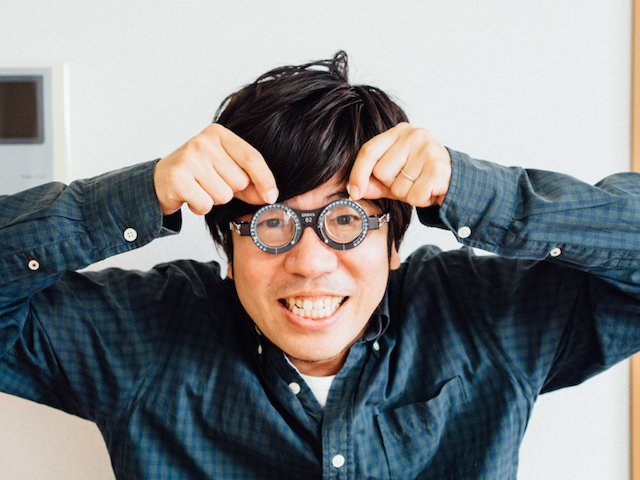

In [10]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('test.jpg'))

matplotlibを使う方法

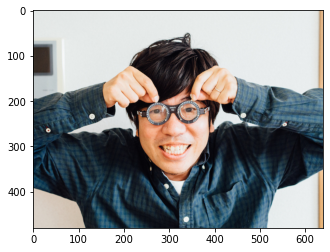

In [11]:
from PIL import Image
from matplotlib.pyplot import imshow

img = Image.open("test.jpg")
imshow(img)
#imshow(img, cmap='gray')

枠線を消したい場合は以下

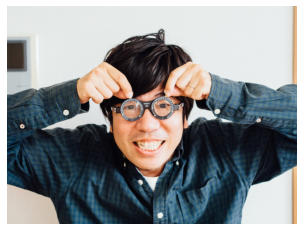

In [12]:
from matplotlib import pyplot as plt 

plt.imshow(img)
plt.axis('off')
plt.show()

## matplotlibで日本語使用

pip で日本語化モジュールをインストール

In [13]:
! pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 14.4MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=90b13203bc9792dcebf8f5a07ba3625d5f22cdf2643146529a987c84ce935812
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


簡単なグラフを描く

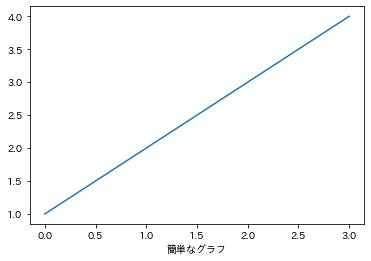

In [15]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # <- これ

plt.plot([1, 2, 3, 4])
plt.xlabel('簡単なグラフ')
plt.show()

## 参考リンク

[【秒速で無料GPUを使う】TensorfFow/Keras/PyTorch/Chainer環境構築 on Colaboratory](https://qiita.com/tomo_makes/items/f70fe48c428d3a61e131)

[【秒速で無料GPUを使う】深層学習実践Tips on Colaboratory](https://qiita.com/tomo_makes/items/b3c60b10f7b25a0a5935)